# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd

#Importing the ACT data as the dataframe 'act' and the SAT data as 'sat'
act = pd.read_csv('../data/act.csv')
sat = pd.read_csv('../data/sat.csv')

##### 2. Print the first ten rows of each dataframe.

In [2]:
display(act[:10])

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [3]:
display(sat[:10])

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

_**Variables in Both Tables:**_
- **Unnamed: 0**: Refers to the number of the row/state; named 'Unnamed' by default in system (Int)
- **State**: State where students took exam (String)
- **Participation**: Percentage of students who took exam (String)


_**ACT-Specific Variables:**_
- **English**: Average score received in English section of exam (Float)
- **Math**: Average score received in Math section of exam (Float)
- **Reading**: Average score received in Reading section of exam (Float)
- **Science**: Average score received in Science section of exam (Float)
- **Composite**: Average Total score received by student (Float)


_**SAT-Specific Variables:**_
- **Evidence-Based Reading and Writing**: Average score received in Reading & Writing Section of exam (Int)
- **Math**: Average score received in Math section of exam (Int)
- **Total**: Combined average score of Reading & Writing and Math sections of exam (Int)

##### 4. Does the data look complete? Are there any obvious issues with the observations?

The only missing values are the possibility of National score averages for the SAT exam. Adding an additional layer of difficulty, however, is that the scores for the ACT range from a 0-36 and the scores for the SAT can reach up to 600, with a total score maximum of 1,200 for the exam. Moreover, our percentages for participation for both exams is stored as a string object.

##### 5. Print the types of each column.

In [4]:
print(act.dtypes)
print()
print(sat.dtypes)

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

Yes, the column '**Evidence-Based Reading and Writing**' should be renamed and we can remove the unnecessary '**Unnamed: 0**' columns since we didn't index the tables before we had begun displaying the data. Moreover, in order to compare data more effectively, we should clean the **Participation** columns so that the percentages are changed to numerical values and aren't strings.

In [5]:
# To avoid issues with calling on columns with spaces, re-labeling Reading & Writing on the SAT accordingly

sat.rename(columns={
        'Evidence-Based Reading and Writing': 'Reading_Writing'
    }, inplace=True)
sat.head()

,Unnamed: 0,State,Participation,Reading_Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055


In [6]:
# Remove blank column as we can index without it 

act.drop('Unnamed: 0', axis=1, inplace=True)
sat.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
# Change strings containing in Participation column '%' to floats

act.Participation = act.Participation.map(lambda x: float(x.replace('%', '')))
sat.Participation = sat.Participation.map(lambda x: float(x.replace('%', '')))

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [8]:
def dictionary_creator(df, series, value_list):
    new_dict = dict([(i,a) for i, a in zip(df[series], df[value_list])])
    # Found this neat zip function for combining the series name with the values in the series on: 
    # https://stackoverflow.com/questions/26716616/convert-a-pandas-dataframe-to-a-dictionary
    # and adapted it to our individual columns here
    return new_dict

# ACT dictionaries:
act_participation = dictionary_creator(act, 'State', 'Participation')
act_english = dictionary_creator(act, 'State', 'English')
act_math = dictionary_creator(act, 'State', 'Math')
act_reading = dictionary_creator(act, 'State', 'Reading')
act_science = dictionary_creator(act, 'State', 'Science')
act_composite = dictionary_creator(act, 'State', 'Composite')

# SAT dictionaries:
sat_participation = dictionary_creator(sat, 'State', 'Participation')
sat_reading_writing = dictionary_creator(sat, 'State', 'Reading_Writing')
sat_math = dictionary_creator(sat, 'State', 'Math')
sat_participation = dictionary_creator(sat, 'State', 'Total')

# Example:
display(act_participation)

{'Alabama': 100.0,
 'Alaska': 65.0,
 'Arizona': 62.0,
 'Arkansas': 100.0,
 'California': 31.0,
 'Colorado': 100.0,
 'Connecticut': 31.0,
 'Delaware': 18.0,
 'District of Columbia': 32.0,
 'Florida': 73.0,
 'Georgia': 55.0,
 'Hawaii': 90.0,
 'Idaho': 38.0,
 'Illinois': 93.0,
 'Indiana': 35.0,
 'Iowa': 67.0,
 'Kansas': 73.0,
 'Kentucky': 100.0,
 'Louisiana': 100.0,
 'Maine': 8.0,
 'Maryland': 28.0,
 'Massachusetts': 29.0,
 'Michigan': 29.0,
 'Minnesota': 100.0,
 'Mississippi': 100.0,
 'Missouri': 100.0,
 'Montana': 100.0,
 'National': 60.0,
 'Nebraska': 84.0,
 'Nevada': 100.0,
 'New Hampshire': 18.0,
 'New Jersey': 34.0,
 'New Mexico': 66.0,
 'New York': 31.0,
 'North Carolina': 100.0,
 'North Dakota': 98.0,
 'Ohio': 75.0,
 'Oklahoma': 100.0,
 'Oregon': 40.0,
 'Pennsylvania': 23.0,
 'Rhode Island': 21.0,
 'South Carolina': 100.0,
 'South Dakota': 80.0,
 'Tennessee': 100.0,
 'Texas': 45.0,
 'Utah': 100.0,
 'Vermont': 29.0,
 'Virginia': 29.0,
 'Washington': 29.0,
 'West Virginia': 69.0,
 '

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [9]:
def exam_dictionary_creator(df):
    new_dict = {}
    # Creates a new dictionary for updating
    for series in df:
        new_dict.update(df.set_index(series).to_dict('list'))
        # also from the same stackoverflow article listed above, where 'list' is a parameter for the to_dict method
    return new_dict

new_act_dict = exam_dictionary_creator(act)
new_sat_dict = exam_dictionary_creator(sat)

# Example:
display(new_act_dict)

# Just for fun, created a mega-dictionary of the two exam dictionaries:
# z = new_act_dict.update(new_sat_dict)
# display(new_act_dict)

{'Composite': [21.0,
  19.2,
  19.8,
  19.7,
  19.4,
  22.8,
  20.8,
  25.2,
  24.1,
  24.2,
  19.8,
  21.4,
  19.0,
  22.3,
  21.4,
  22.6,
  21.9,
  21.7,
  20.0,
  19.5,
  24.3,
  23.6,
  25.4,
  24.1,
  21.5,
  18.6,
  20.4,
  20.3,
  21.4,
  17.8,
  25.5,
  23.9,
  19.7,
  24.2,
  19.1,
  20.3,
  22.0,
  19.4,
  21.8,
  23.7,
  24.0,
  18.7,
  21.8,
  19.8,
  20.7,
  20.3,
  23.6,
  23.8,
  21.9,
  20.4,
  20.5,
  20.2],
 'English': [20.3,
  18.9,
  18.7,
  18.6,
  18.9,
  22.5,
  20.1,
  25.5,
  24.1,
  24.4,
  19.0,
  21.0,
  17.8,
  21.9,
  21.0,
  22.0,
  21.2,
  21.1,
  19.6,
  19.4,
  24.2,
  23.3,
  25.4,
  24.1,
  20.4,
  18.2,
  19.8,
  19.0,
  20.9,
  16.3,
  25.4,
  23.8,
  18.6,
  23.8,
  17.8,
  19.0,
  21.2,
  18.5,
  21.2,
  23.4,
  24.0,
  17.5,
  20.7,
  19.5,
  19.5,
  19.5,
  23.3,
  23.5,
  20.9,
  20.0,
  19.7,
  19.4],
 'Math': [20.7,
  18.4,
  19.8,
  19.8,
  19.0,
  22.7,
  20.3,
  24.6,
  23.4,
  23.5,
  19.4,
  20.9,
  19.2,
  21.8,
  21.2,
  22.4,
  21.3

##### 9. Merge the dataframes on the state column.

In [10]:
both_exams = pd.merge(act, sat, on='State', suffixes=('_ACT', '_SAT'))

# Checking it worked
both_exams.head()

,State,Participation_ACT,English,Math_ACT,Reading,Science,Composite,Participation_SAT,Reading_Writing,Math_SAT,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [11]:
# Checking column names
both_exams.columns

Index(['State', 'Participation_ACT', 'English', 'Math_ACT', 'Reading',
       'Science', 'Composite', 'Participation_SAT', 'Reading_Writing',
       'Math_SAT', 'Total'],
      dtype='object')

In [12]:
# For easier labeling on graphs, renaming everything based on exam in merged dataframe

both_exams.rename(columns={
        'English':'English_ACT',
        'Reading':'Reading_ACT',
        'Science':'Science_ACT',
        'Composite':'Composite_ACT',
        'Reading_Writing':'Reading_Writing_SAT',
        'Total':'Total_SAT'}, inplace=True)
both_exams.head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [13]:
print(both_exams.min())
print()
print(both_exams.max())

State                  Alabama
Participation_ACT            8
English_ACT               16.3
Math_ACT                    18
Reading_ACT               18.1
Science_ACT                2.3
Composite_ACT             17.8
Participation_SAT            2
Reading_Writing_SAT        482
Math_SAT                    52
Total_SAT                  950
dtype: object

State                  Wyoming
Participation_ACT          100
English_ACT               25.5
Math_ACT                  25.3
Reading_ACT                 26
Science_ACT               24.9
Composite_ACT             25.5
Participation_SAT          100
Reading_Writing_SAT        644
Math_SAT                   651
Total_SAT                 1295
dtype: object


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [14]:
sd = ['No Standard Deviation']
# The first entry in sd should be this string as the first series in the dataframe is the state names
def standard_deviation_calc(df):
    [sd.append(df[i].std()) for i in df.columns if df[i].dtype == float or df[i].dtype == int]
    return sd
    
standard_deviation_calc(both_exams)
print(sd)

['No Standard Deviation', 32.14084201588683, 2.35367713980303, 1.9819894936505533, 2.0672706264873146, 3.182462975155452, 2.020694891154341, 35.276632270013046, 45.66690138768932, 84.90911865855486, 92.49481172519046]


## Step 2: Manipulate the dataframe

##### 13. Turn the list sd into a new observation in your dataset.

-- Exercise skipped per instruction --

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [15]:
both_exams.sort_values(by=['Participation_ACT'], ascending=False, inplace=True)

# Show last few rows to demonstrate descending order
both_exams.tail()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
38,Pennsylvania,23.0,23.4,23.4,24.2,23.3,23.7,65.0,540,531,1071
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539,524,1062
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532,520,1052
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513,499,1012


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [16]:
# To filter for those states with a Particpation in the ACT exam of at least 50%

both_exams[both_exams['Participation_ACT'] > 50][['State', 'Participation_ACT']]

,State,Participation_ACT
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


In [17]:
# The following is two create a new dataframe displaying participation above 50% for BOTH exams, not JUST the ACT

both_exams2 = both_exams[both_exams['Participation_ACT'] > 50][['State', 'Participation_ACT', 'Participation_SAT']]
both_exams2[both_exams2['Participation_SAT'] > 50][['State', 'Participation_ACT', 'Participation_SAT']]

,State,Participation_ACT,Participation_SAT
11,Hawaii,90.0,55.0
9,Florida,73.0,83.0
10,Georgia,55.0,61.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the [Participation] Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

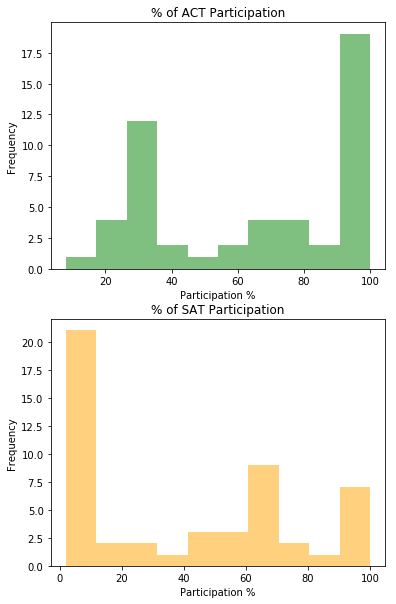

In [19]:
figure, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(6,10));

# Identify each graph with a variable to add labels and titles below
act = both_exams['Participation_ACT'].plot(title="ACT Participation %", 
                                           kind="hist", ax=ax[0], color="Green", alpha=.5)
sat = both_exams['Participation_SAT'].plot(title="SAT Participation %", 
                                           kind="hist", ax=ax[1], color="Orange", alpha=.5)

# Updating labels for each graph
act.set_xlabel('Participation %')
act.set_ylabel('Frequency')


sat.set_xlabel('Participation %')
sat.set_ylabel('Frequency')

# Setting titles for each graph
act.set_title('% of ACT Participation')
sat.set_title('% of SAT Participation');

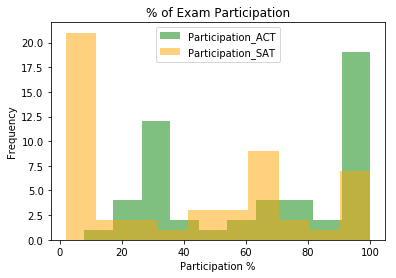

In [20]:
# The following overlays the two Participation percentages

act = both_exams['Participation_ACT'].plot(kind="hist", color="Green", alpha=0.5);
sat = both_exams['Participation_SAT'].plot(kind="hist", color="Orange", alpha=0.5);
act.set_xlabel('Participation %')
act.set_title('% of Exam Participation')
plt.legend();

##### 17. Plot the Math(s) distributions from both data sets.

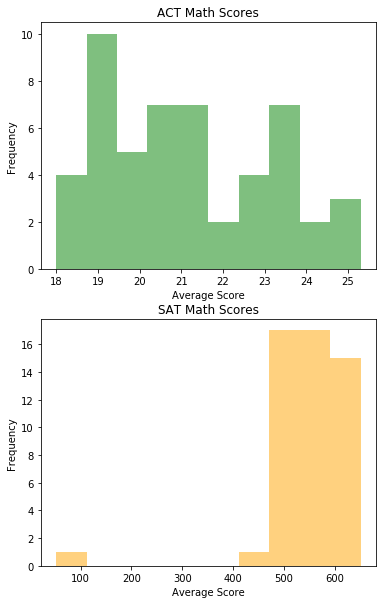

In [21]:
# Because the scoring for subjects is along dramatically different ranges (36 is the maximum score on the ACT and 
# 800 is the maximum score for any subject on the SAT), these are not overlayed below

figure, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(6, 10));

act = both_exams['Math_ACT'].plot(kind="hist", ax=ax[0], color="Green", alpha=0.5);
sat = both_exams['Math_SAT'].plot(kind="hist", ax=ax[1], color="Orange", alpha=0.5);

act.set_xlabel('Average Score')
act.set_ylabel('Frequency')

sat.set_xlabel('Average Score')
sat.set_ylabel('Frequency')

act.set_title('ACT Math Scores')
sat.set_title('SAT Math Scores');

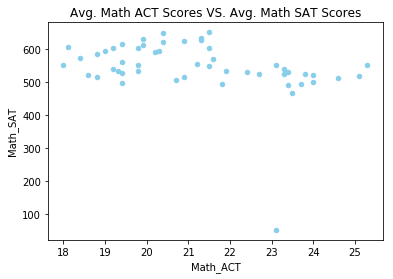

In [22]:
# Visualizing the Math scores on a scatterplot because of score range issues as explained above

math = both_exams.plot(x="Math_ACT", y="Math_SAT", 
            title = "Avg. Math ACT Scores VS. Avg. Math SAT Scores", kind="scatter", color="skyblue")

##### 18. Plot the Verbal distributions from both data sets.

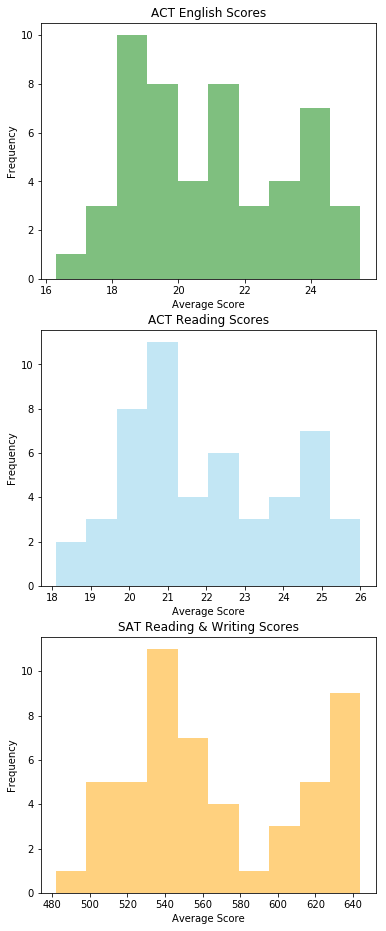

In [23]:
# Interpreting 'Verbal' for the ACT to be BOTH the English AND the Reading subject scores
figure, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(6, 16));

act_english = both_exams['English_ACT'].plot(kind="hist", ax=ax[0], color="Green", alpha=0.5);
act_reading = both_exams['Reading_ACT'].plot(kind="hist", ax=ax[1], color="SkyBlue", alpha=0.5);
sat = both_exams['Reading_Writing_SAT'].plot(kind="hist", ax=ax[2], color="Orange", alpha=0.5)

act_english.set_xlabel('Average Score')
act_english.set_ylabel('Frequency')

act_reading.set_xlabel('Average Score')
act_reading.set_ylabel('Frequency')

sat.set_xlabel('Average Score')
sat.set_ylabel('Frequency')

act_english.set_title('ACT English Scores')
act_reading.set_title('ACT Reading Scores')
sat.set_title('SAT Reading & Writing Scores');

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

The most common assumption is that with more and more samples provided, the distributions will tend towards Normal distributions (as a function of the Central Limit Theorem).

##### 20. Does this assumption hold true for any of our columns? Which?

Our distributions don't reflect overall normalcy, with the exception of two: the average scores for the Science portion of the ACT and the Math scores on the SAT are closer to normal except for outlier scores reported.

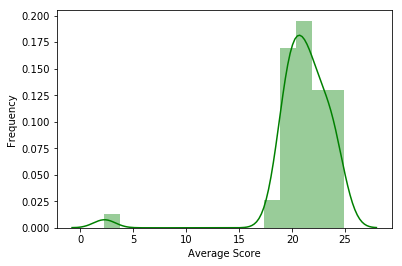

In [24]:
# See the distribution below as an example of the above in visual form
science = sns.distplot(both_exams['Science_ACT'], kde=True, color='Green')
science.set(xlabel='Average Score', ylabel='Frequency');

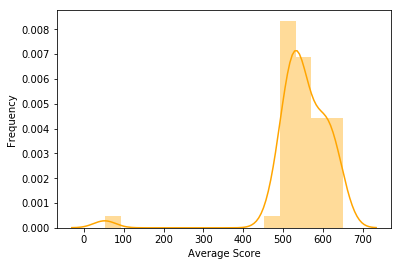

In [25]:
math = sns.distplot(both_exams['Math_SAT'], kde=True, color='Orange')
math.set(xlabel='Average Score', ylabel='Frequency');

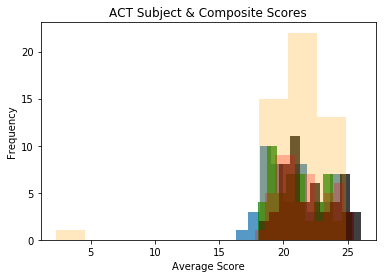

In [26]:
# The following ACT scores overlayed demonstrate that Science is clearly the most normally distributed (like above) 
# relative to the others

act_all = both_exams['English_ACT'].plot(kind="hist", alpha=0.75)
both_exams['Math_ACT'].plot(kind="hist", color="Green", alpha=0.75)
both_exams['Reading_ACT'].plot(kind="hist", color="Black", alpha=0.75)
both_exams['Science_ACT'].plot(kind="hist", color="Orange", alpha=0.25)
both_exams['Composite_ACT'].plot(kind="hist", color="Red", alpha=0.25)
act_all.set_xlabel('Average Score')
act_all.set_title('ACT Subject & Composite Scores');

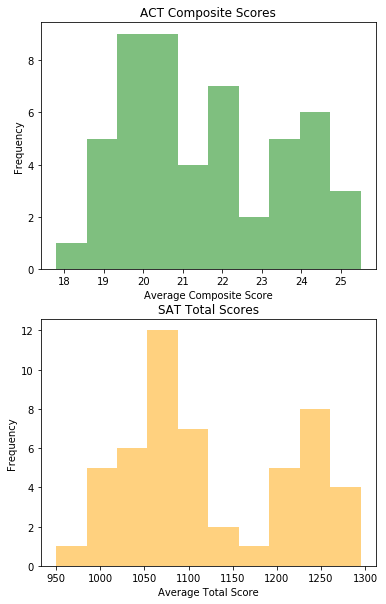

In [27]:
# The two figures below weren't requested, but are great for visualizing the distributions of average Composite/Total
# scores for the exams
figure, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(6, 10));

act = both_exams['Composite_ACT'].plot(kind="hist", ax=ax[0], color="Green", alpha=0.5);
sat = both_exams['Total_SAT'].plot(kind="hist", ax=ax[1], color="Orange", alpha=0.5);

act.set_xlabel('Average Composite Score')
act.set_ylabel('Frequency')

sat.set_xlabel('Average Total Score')
sat.set_ylabel('Frequency')

act.set_title('ACT Composite Scores')
sat.set_title('SAT Total Scores');

##### 21. Plot some scatterplots examining relationships between all variables.

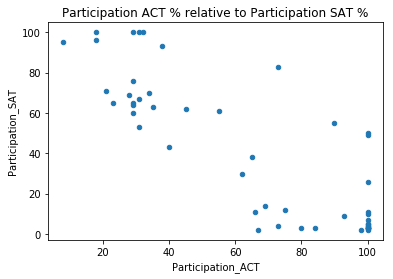

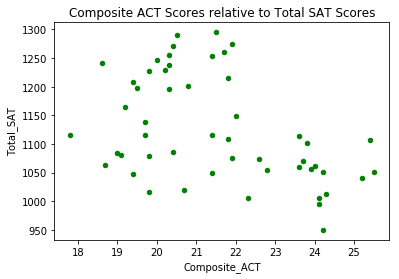

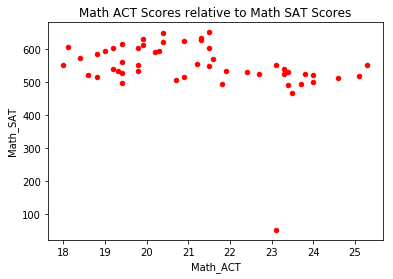

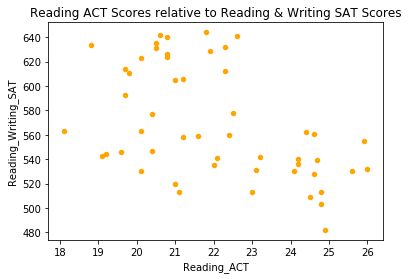

In [28]:
# The following compares Participation % for both the ACT and the SAT
both_exams.plot(x="Participation_ACT", y="Participation_SAT", 
            title = "Participation ACT % relative to Participation SAT %", kind="scatter");

# The following compares Composite scores for the ACT against the Total Scores for the SAT
both_exams.plot(x="Composite_ACT", y="Total_SAT", 
            title = "Composite ACT Scores relative to Total SAT Scores", kind="scatter", color="Green");

# The following compares Math scores for both exams
both_exams.plot(x="Math_ACT", y="Math_SAT", 
            title = "Math ACT Scores relative to Math SAT Scores", kind="scatter", color="Red");

# The following compares Reading scores for both exams
both_exams.plot(x="Reading_ACT", y="Reading_Writing_SAT", 
            title = "Reading ACT Scores relative to Reading & Writing SAT Scores", kind="scatter", color="Orange");

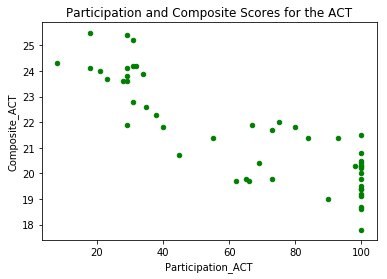

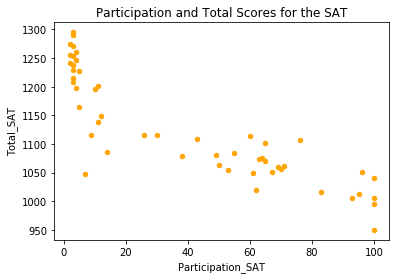

In [29]:
# The following compares Participation and Composite Scores for the ACT
both_exams.plot(x="Participation_ACT", y="Composite_ACT", 
            title = "Participation and Composite Scores for the ACT", kind="scatter", color="Green");

# The following compares Participation and Total Scores for the SAT
both_exams.plot(x="Participation_SAT", y="Total_SAT", 
            title = "Participation and Total Scores for the SAT", kind="scatter", color="Orange");

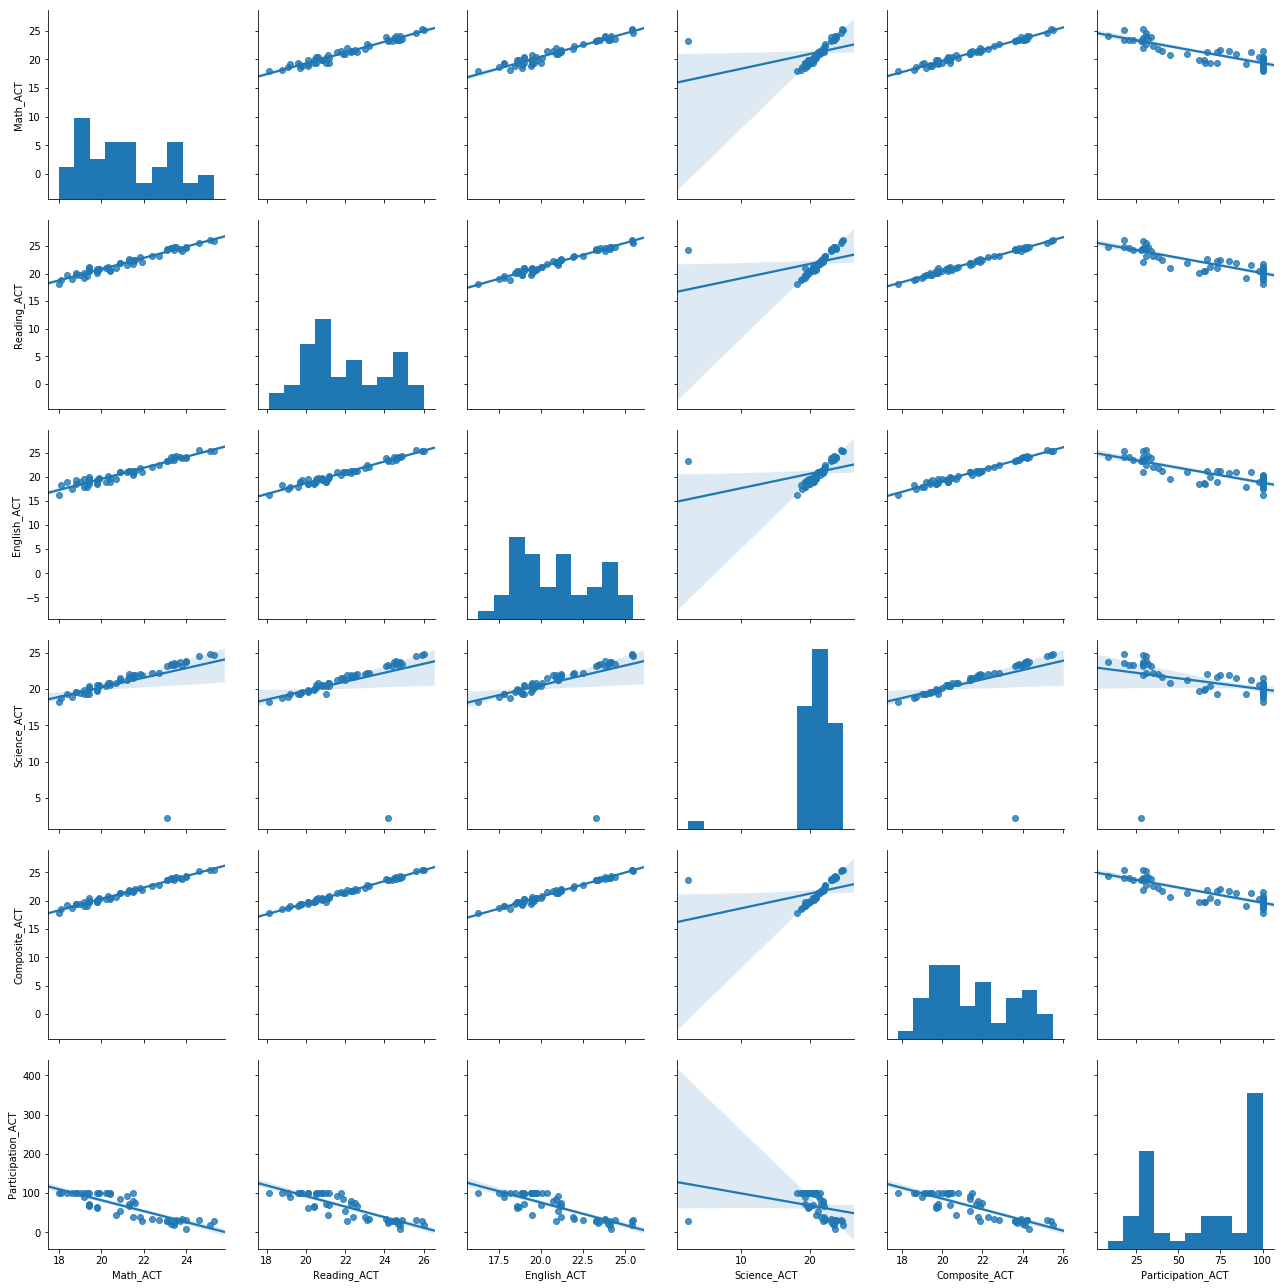

In [30]:
# The following are comparisons of all of the ACT scores and Participation %
sns.pairplot(both_exams, size=3,
             x_vars=["Math_ACT", "Reading_ACT", "English_ACT", "Science_ACT", "Composite_ACT", "Participation_ACT"],
             y_vars=["Math_ACT", "Reading_ACT", "English_ACT", "Science_ACT", "Composite_ACT", "Participation_ACT"], 
             kind="reg");

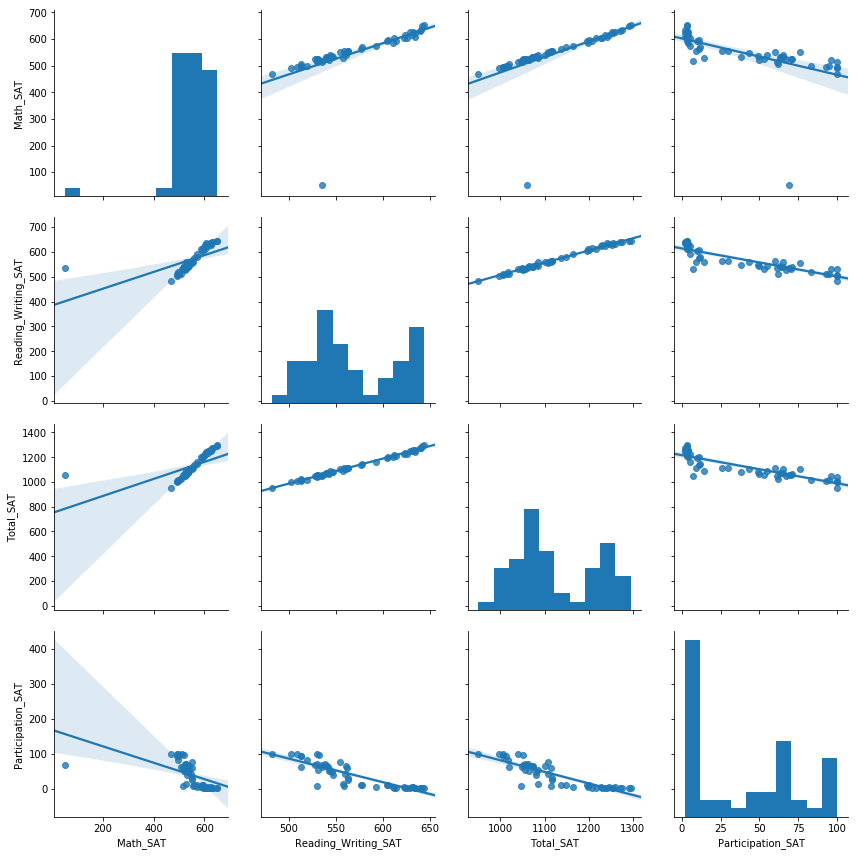

In [31]:
# The following are comparisons of all of the SAT scores and Participation %
sns.pairplot(both_exams, size=3,
             x_vars=["Math_SAT", "Reading_Writing_SAT", "Total_SAT", "Participation_SAT"],
             y_vars=["Math_SAT", "Reading_Writing_SAT", "Total_SAT", "Participation_SAT"], 
             kind="reg");

In [33]:
# The following are the same scatterplots for some variables in matplotlib in a larger format for the ACT
# both_exams.plot(x="Participation_ACT", y="Composite_ACT", 
#             title = "Participation ACT % relative to Composite ACT Scores", kind="scatter", color="Red")
# both_exams.plot(x="Reading_ACT", y="Composite_ACT", 
#             title = "Reading ACT Scores relative to Composite ACT Scores", kind="scatter", color="Orange")
# both_exams.plot(x="English_ACT", y="Composite_ACT", 
#             title = "English ACT Scores relative to Composite ACT Scores", kind="scatter", color="Yellow")
# both_exams.plot(x="Math_ACT", y="Composite_ACT", 
#             title = "Math ACT Scores relative to Composite ACT Scores", kind="scatter", color="Green")
# both_exams.plot(x="Science_ACT", y="Composite_ACT", 
#             title = "Science ACT Scores relative to Composite ACT Scores", kind="scatter", color="Blue")
# both_exams.plot(x="Reading_ACT", y="English_ACT", 
#             title = "Reading ACT Scores relative to English ACT Scores", kind="scatter", color="Indigo")
# both_exams.plot(x="English_ACT", y="Math_ACT", 
#             title = "English ACT Scores relative to Math ACT Scores", kind="scatter", color="Black")
# both_exams.plot(x="Math_ACT", y="Reading_ACT", 
#             title = "Math ACT Scores relative to Reading ACT Scores", kind="scatter", color="Teal")
# both_exams.plot(x="Math_ACT", y="Science_ACT", 
#             title = "Math ACT Scores relative to Science ACT Scores", kind="scatter", color="Pink")

# Similarly, the following are the same scatterplots in matplotlib for all of the SAT variables
# both_exams.plot(x="Participation_SAT", y="Total_SAT", 
#             title = "Participation SAT % relative to Total ACT Scores", kind="scatter", color="Orange")
# both_exams.plot(x="Reading_Writing_SAT", y="Total_SAT", 
#             title = "Reading & Writing SAT Scores relative to Total SAT Scores", kind="scatter", color="Green")
# both_exams.plot(x="Math_SAT", y="Total_SAT", 
#             title = "Math SAT Scores relative to Total SAT Scores", kind="scatter", color="Blue")
# both_exams.plot(x="Math_SAT", y="Reading_Writing_SAT", 
#             title = "Math SAT Scores relative to Reading & Writing SAT Scores", kind="scatter", color="Purple");

##### 22. Are there any interesting relationships to note?

Yes, several. We can see that:

- For states with very high participation levels, composite/total scores often tend to drop. 
- A math score in one exam is unlikely to predict the math score for the other exam.
- Higher participation in either exam shows a negative relationship with scores.
- All individual subjects (Reading, Science, Math, English, and Reading & Writing) show a generally positive relationship amongst the subject, indicating doing well in one subject generally suggests doing well in the others.


##### 23. Create box plots for each variable. 

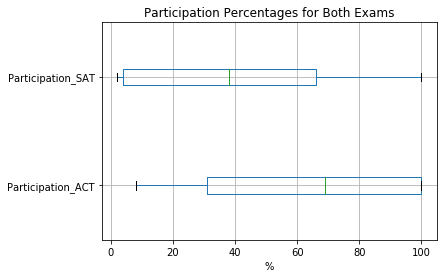

In [34]:
# Participation for both exams

fig, ax = plt.subplots()
boxes = both_exams[['Participation_ACT', 'Participation_SAT']].boxplot(ax=ax, vert=False)
plt.xlabel('%')
plt.title('Participation Percentages for Both Exams');

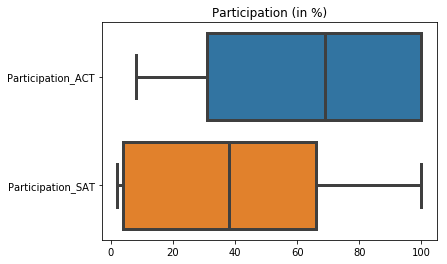

In [35]:
# Participation for both exams like above, except this and the following are done in Seaborn for visual aesthetics

sns.boxplot(data=both_exams.drop(['Math_ACT', 'English_ACT', 'Science_ACT','Reading_ACT', 'Composite_ACT',
                                  'Math_SAT', 'Reading_Writing_SAT',
                                  'Total_SAT'],axis=1),
            orient='h', fliersize = 5, linewidth=3, notch = False, saturation = 0.75).set_title('Participation (in %)');

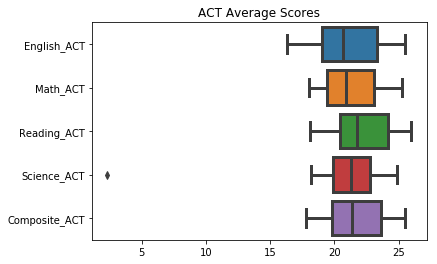

In [36]:
# All ACT average scores

sns.boxplot(data=both_exams.drop(['Participation_ACT', 'Participation_SAT', 
                                  'Math_SAT', 'Reading_Writing_SAT',
                                  'Total_SAT'],axis=1), 
            orient='h', fliersize = 5, linewidth=3, notch = False, saturation = 0.75).set_title('ACT Average Scores');

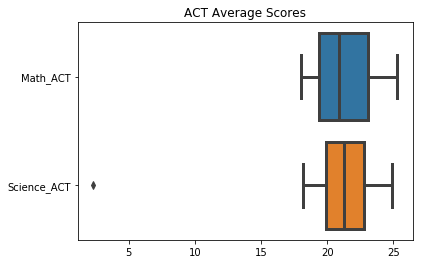

In [37]:
sns.boxplot(data=both_exams.drop(['Participation_ACT', 'Participation_SAT', 
                                  'Math_SAT', 'Reading_Writing_SAT', 'English_ACT', 'Reading_ACT', 'Composite_ACT',
                                  'Total_SAT'],axis=1), 
            orient='h', fliersize = 5, linewidth=3, notch = False, saturation = 0.75).set_title('ACT Average Scores');

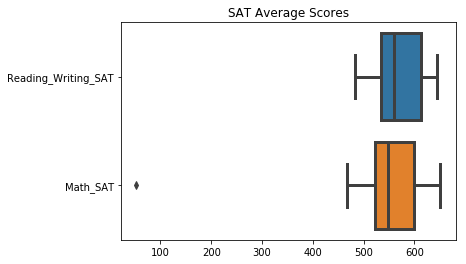

In [38]:
# All SAT average scores

sns.boxplot(data=both_exams.drop(['Participation_ACT', 'Participation_SAT', 
                                  'Math_ACT', 'English_ACT', 'Science_ACT', 'Reading_ACT', 'Composite_ACT', 
                                  'Total_SAT'],axis=1), 
            orient='h', fliersize = 5, linewidth=3, notch = False, saturation = 0.75).set_title('SAT Average Scores');

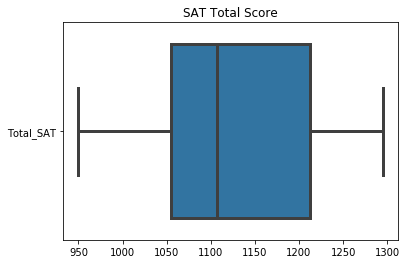

In [39]:
# Total average SAT score (as summed values, this should be on its own scale)

sns.boxplot(data=both_exams.drop(['Participation_ACT', 'Participation_SAT', 
                                  'Math_ACT', 'English_ACT', 'Science_ACT', 'Reading_ACT', 'Composite_ACT', 
                                  'Reading_Writing_SAT', 'Math_SAT'],axis=1), 
            orient='h', fliersize = 5, linewidth=3, notch = False, saturation = 0.75).set_title('SAT Total Score');

In [40]:
# The following are the boxplots for the above boxplots, but in matplotlib instead
# All ACT Scores
# fig, ax = plt.subplots()
# boxes = both_exams[['Reading_ACT',
#                     'English_ACT', 
#                     'Math_ACT', 
#                     'Science_ACT', 
#                     'Composite_ACT']].boxplot(ax=ax, vert=False)
# plt.xlabel('Average Score')
# plt.title('ACT Scores for Subjects & Composite');

# All SAT Subjects
# fig, ax = plt.subplots()
# boxes = both_exams[['Reading_Writing_SAT',
#                     'Math_SAT']].boxplot(ax=ax, vert=False)
# plt.xlabel('Average Score')
# plt.title('SAT Scores for Subjects');

# SAT Total Score
# fig, ax = plt.subplots()
# boxes = both_exams[['Total_SAT']].boxplot(ax=ax, vert=False)
# plt.xlabel('Average Score')
# plt.title('SAT Total Scores');

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

-- Skipped per instruction --

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [41]:
both_exams.describe().T

,count,mean,std,min,25%,50%,75%,max
Participation_ACT,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
English_ACT,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
Math_ACT,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
Reading_ACT,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
Science_ACT,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
Composite_ACT,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
Participation_SAT,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
Reading_Writing_SAT,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
Math_SAT,51.0,547.627451,84.909119,52.0,522.00,548.0,599.00,651.0
Total_SAT,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


- In the ACT we see that the mean participation percentage amongst states was approximately 65%. Additionally, approximately 64% of participation percentages fell within about 33% participation and 97% participation (reflecting a standard deviation of approximately 32%). The distribution (as seen in the histogram above) is far from normal, with a strong cluster at the 100% participation percentage level - this reflects a considerable number of states requiring participation in the ACT exam.
- Conversely, in the SAT exam, the participation mean for states was approximately 39%, with a standard deviation of 35% above and below the mean (accounting for roughly 64% of the participation percentages). As with the ACT, we do not see a normal distribution here, however the cluster is focused much more closely to under 10% participation.


- On the English portion of the ACT, the average score was approximately 20.9, with a standard deviation of about 2.4 points from the mean (which accounts for roughly 64% of the scores). The distribution isn't very normal, with at least three different modes shown.
- In the Math section of the ACT we see a slightly higher mean score of 21.1, with a standard deviation of about 2.0 from the mean - suggesting a higher concentration around the mean than English. The distribution almost appears bimodal, with scores generally tending towards either higher or lower, but not centered around a specific score.
- In the Reading section of the ACT the mean score was the highest of all subjects at 22.0, with a standard deviation of about 2.1 points from the mean. Much like the distribution of English scores, the Reading scores look similarly multimodal.
- The Science portion of the ACT had an average score of 21.0 with the greatest standard deviation amongst the subjects at 3.2, suggesting a lot of fluctuation around the mean. As visualized above, it looks the closest of all the subjects to a normal distribution, with the exception of some outlier scores that are far outside of the Interquartile Range (which holda roughly 25% to 75% of the scores).
- Finally, the Composite ACT average score was approximately 21.5, with a standard deviation of 2.0 points above and below the mean. As seen above, this distribution is also not very normally distributed, and looks rather multimodal. 


- In the SAT, the average score in the Reading & Writing section was about 569.1, with a standard deviation of about 45.7 from the mean. The visualization of the scores demonstrates a bimodal tendency, and reflects a non-normal distribution.
- Additionally, the Math section of the SAT had an average score of 547.6 points, with a greater standard deviation of approximately 84.9 points from the mean, suggesting significant spread. The distribution for Math looks similar to that of the Science scores for the SAT, in that it is highly clustered and distributed in one area, with a few outliers way outside of the IQR.
- Finally, the Total SAT average score was approximately 1,126.1 points (the Math and Reading & Writing sections are summed for this score, unlike the Composite score of the ACT) with a standard deviation of approximately of about 92.5 points above and below the mean. In looking at the distribution for the Total SAT scores, we can see that, like the Composite ACT scores, the distribution isn't normal, but clearly bimodal. 

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

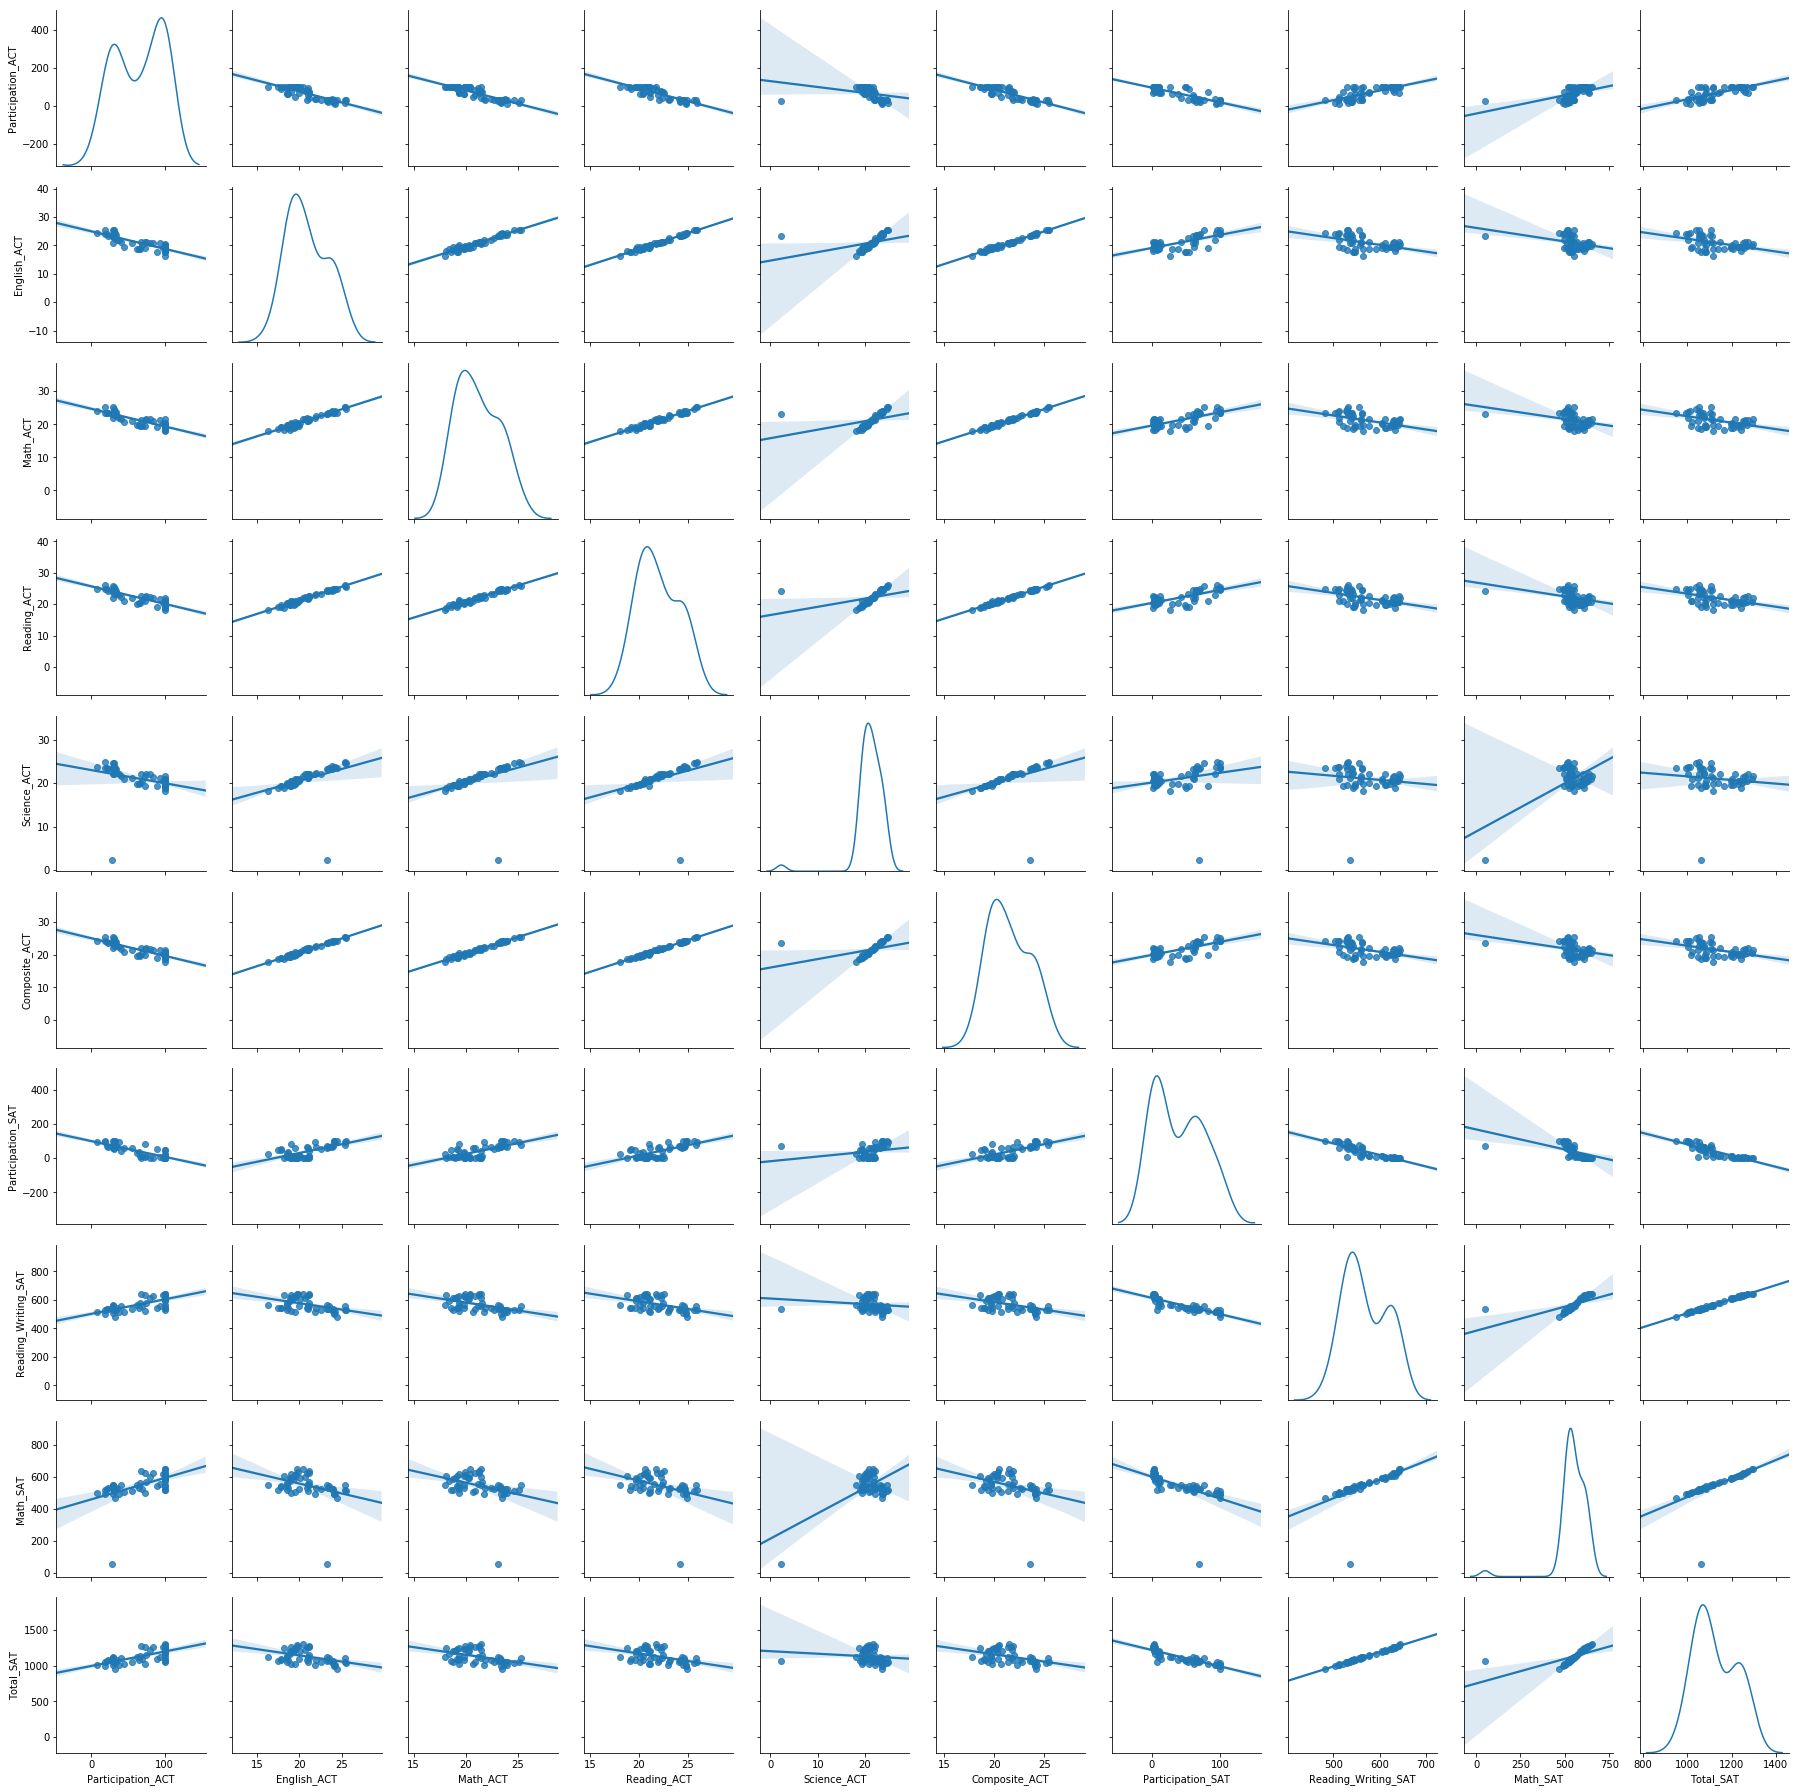

In [42]:
# The following are all of variables in a scatter plot
sns.pairplot(both_exams, diag_kind='kde', kind='reg');

In [43]:
# Putting the above into correlation coefficients for additional context
both_exams.corr()

,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
Participation_ACT,1.000000,-0.843501,-0.861114,-0.866620,-0.304992,-0.858134,-0.841234,0.716153,0.507670,0.701477
English_ACT,-0.843501,1.000000,0.967803,0.985999,0.403456,0.990856,0.686889,-0.461345,-0.345342,-0.441947
Math_ACT,-0.861114,0.967803,1.000000,0.979630,0.412318,0.990451,0.710697,-0.486126,-0.340906,-0.454116
Reading_ACT,-0.866620,0.985999,0.979630,1.000000,0.401097,0.995069,0.705352,-0.488441,-0.363099,-0.466558
Science_ACT,-0.304992,0.403456,0.412318,0.401097,1.000000,0.408656,0.248553,-0.135461,0.594714,-0.121783
Composite_ACT,-0.858134,0.990856,0.990451,0.995069,0.408656,1.000000,0.694748,-0.470382,-0.346335,-0.445020
Participation_SAT,-0.841234,0.686889,0.710697,0.705352,0.248553,0.694748,1.000000,-0.874326,-0.566558,-0.867540
Reading_Writing_SAT,0.716153,-0.461345,-0.486126,-0.488441,-0.135461,-0.470382,-0.874326,1.000000,0.628405,0.996661
Math_SAT,0.507670,-0.345342,-0.340906,-0.363099,0.594714,-0.346335,-0.566558,0.628405,1.000000,0.632648
Total_SAT,0.701477,-0.441947,-0.454116,-0.466558,-0.121783,-0.445020,-0.867540,0.996661,0.632648,1.000000


- As seen above, most of the variables demonstrate a positive relationship amongst **subject scores and composite/total scores** within the exams, as seen by correlation coefficients ranging from 0.4 - 0.9. 
- **Participation** generally suggests a negative relationship with scores, with correlation coeffecients ranging from -0.8 to -0.3. 
- However, **higher scores in one subject or total/composite** on an exam tends to show some negative relationships with doing well in the same subject on the other exam, with coefficients ranging from -0.1 to -0.5.
- Finally, **Participation and final scores** shows a very high negative relationship for coefficients of over -0.8.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

- **Null Hypothesis (H0)**: The SAT and ACT participation rates are the same.
- **Alternative Hypothesis (H1)**: The SAT and ACT participation rates are different.
- **Alternative Hypothesis (H2)**: The SAT participation rates are greater than the ACT participation rates.
- **Alternative Hypothesis (H3)**: The SAT participation rates are less than the ACT participation rates.

In [44]:
import scipy.stats as stats

# Running a T-test on these samples as we have over 30 samples (50 states)
result = stats.ttest_ind(both_exams['Participation_ACT'], both_exams['Participation_SAT'])
result.statistic, result.pvalue

(3.8085778908170544, 0.00024134203698662353)

Given a p-value of 0.0002 and an alpha-level of 0.05, we can safely reject the null hypothesis and assume the differences are not due to random chance.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [45]:
# The below is code that was written for a similar lab exercise.
def confidence_interval_calculator(df, series, lvl_significance):
    """This function will only take levels of significance of 90, 95, or 99 as we don't have a table of z-scores
    to build from."""
    if lvl_significance == 90:
        z_star = 1.645
    elif lvl_significance == 95:
        z_star = 1.96
    elif lvl_significance == 99:
        z_star = 2.575    
    else:
        print("Please insert a value of 90, 95, or 99.") 
        # The above accounts for any values that aren't the above three for which we have z-scores for.
        return None
    sample_mean = df[series].mean()
    sigma = df[series].std()
    sem = df[series].sem()
    n = df[series].count()    
    low_end = sample_mean - z_star * sigma / n ** 0.5
    high_end = sample_mean + z_star * sigma / n ** 0.5
    print('For the data in the column {}, we are {}% confident that a sample mean taken would fall between {} and {}.'
          .format(series, lvl_significance, low_end, high_end))

In [46]:
confidence_interval_calculator(both_exams, 'Participation_SAT', 95)
print()
confidence_interval_calculator(both_exams, 'Participation_ACT', 95)

For the data in the column Participation_SAT, we are 95% confident that a sample mean taken would fall between 30.122077111168757 and 49.48576602608615.

For the data in the column Participation_ACT, we are 95% confident that a sample mean taken would fall between 56.43369049287186 and 74.07611342869676.


##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, the ranges of the confidence intervals for the sample means above don't overlap at any point, so it's not strange that the p-value was so significant.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [47]:
# Running a Pearson correlation coefficient test and generate a p-value for this coefficient

stats.pearsonr(both_exams['Math_SAT'], both_exams['Math_ACT'])

(-0.34090589596888177, 0.014364260355773893)

In [48]:
# Running a Pearson correlation coefficient test and generate a p-value for this coefficient

stats.pearsonr(both_exams['Participation_SAT'], both_exams['Total_SAT'])

(-0.8675398128324197, 1.7814888733993433e-16)

Given the correlation coefficient for the math scores between both exams and a p-value of 0.01 of that coefficient, we can say that there is a **significant negative correlation between the two math scores**.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

Yes, it is always worth delving further into the relationship between variables with correlation coefficients, T-tests, and p-values to take a deeper investigative look at whether our results are significant in any direction. While we may have some outliers here and there, with a sample size of fifty states, we can draw some useful general conclusions from the statistical inference tests that we run.

That being said, our distributions would look more normal if we had the individual datum for each state, rather than the averages. However, it is still worth running statistical analyses to pull conclusions since we have a sufficient sample here.

# ** This is the link to the Google Slides presentation created for this assignment: **

https://docs.google.com/presentation/d/1PdxB46EL4O-8Cgby6rGd8aET331mTh3-Tt4s30BDZLo/edit?usp=sharing